# Using HeatMap

In [ ]:
import pandas as pd
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)}
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}
    
    size_scale = 500
    ax.scatter (
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

data = pd.read_csv("BRCA.csv")
columns = ['Age', 'Gender', 'Tumour_Stage', 'Surgery_type', 'Patient_Status']
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [2]:
pip install seaborn

     |████████████████████████████████| 285 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 32.8 MB 5.3 kB/s eta 0:00:011
     |████████████████████████████████| 2.9 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 927 kB/s  eta 0:00:01
You should consider upgrading via the '/Users/Skjperez/.virtualenvs/map_project/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


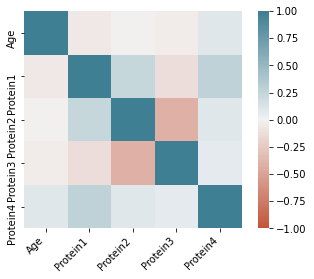

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('BRCA.csv')

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Creating a histogram from the data

<AxesSubplot:xlabel='Age', ylabel='Count'>

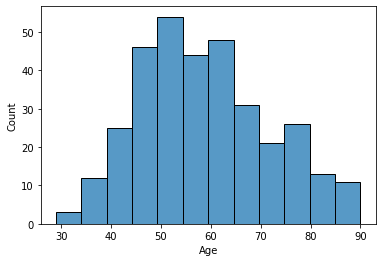

In [3]:
sns.histplot(data["Age"])

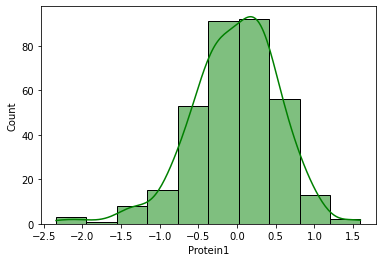

In [7]:
sns.histplot(data["Protein1"], bins=10, kde=True, color='green');

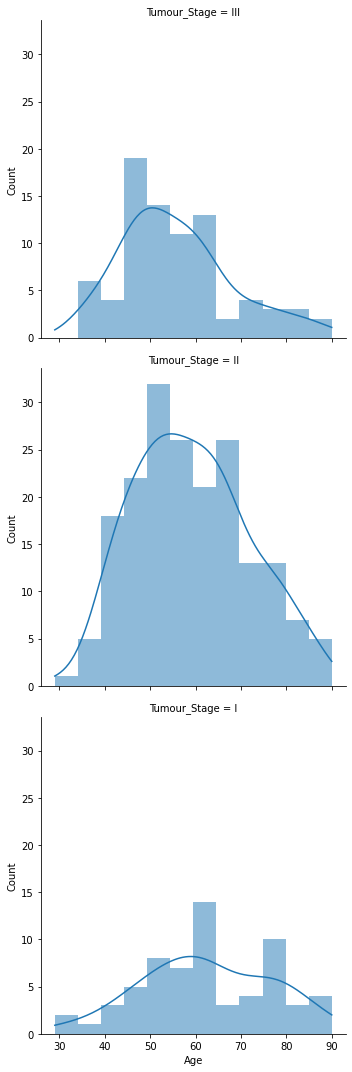

In [25]:
sns.displot(x="Age", row="Tumour_Stage", data=data, linewidth=0, kde=True);

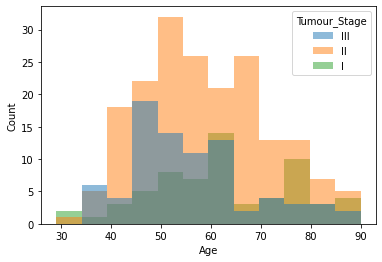

In [27]:
sns.histplot(x="Age", hue="Tumour_Stage", data=data, linewidth=0);

# Boxplot 

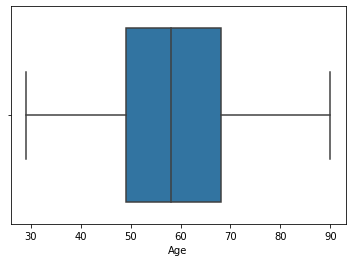

In [9]:
sns.boxplot(x=data["Age"]);

In [17]:
TypeTwoTumour = data[data["Tumour_Stage"] == 'II']
print(TypeTwoTumour)

       Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
1    TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
3    TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4    TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   
6    TCGA-D8-A73X  53.0  FEMALE -0.069535   1.41830  -0.36105  0.391580   
8    TCGA-EW-A1P5  77.0  FEMALE -0.151750  -0.66332   1.18940  0.217180   
..            ...   ...     ...       ...       ...       ...       ...   
325  TCGA-BH-A0BV  78.0  FEMALE -0.917230  -0.64693   0.55259  0.458740   
326  TCGA-AO-A1KO  46.0  FEMALE -0.740140  -0.73755   0.72032  0.721820   
327  TCGA-E2-A1B5  46.0  FEMALE -0.055036  -0.50643   0.88778 -0.089424   
330  TCGA-A8-A085  44.0    MALE  0.732720   1.11170  -0.26952 -0.354920   
331  TCGA-A1-A0SG  61.0  FEMALE -0.719470   2.54850  -0.15024  0.339680   

    Tumour_Stage                       Histology ER status PR status  \
1             II           

In [18]:
TypeTwoTumour["Age"].mean()

59.05291005291005

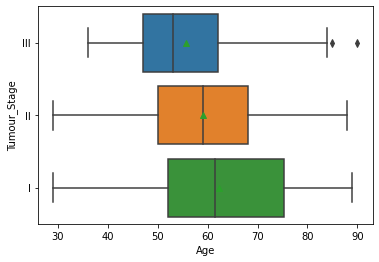

In [24]:
sns.boxplot(x=data["Age"], y=data["Tumour_Stage"], showmeans=True);

# Numpy

In [20]:
import numpy as np
data["Gender_Identify"] = np.where(data["Gender"] == 'MALE', 1, 0)
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gender_Identify
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive,0
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead,0
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive,0
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive,0
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead,0


# contingency table

In [28]:
contab_freq = pd.crosstab(
    data["Gender"],
    data["HER2 status"],
    margins = True
    )
contab_freq

HER2 status,Negative,Positive,All
Gender,,,
FEMALE,301,29,330
MALE,4,0,4
All,305,29,334


In [29]:
#shows probability 

In [30]:
contab_freq = pd.crosstab(
    data["Tumour_Stage"],
    data["Patient_Status"],
    margins = True,
    normalize = "index"
    )
contab_freq

Patient_Status,Alive,Dead
Tumour_Stage,,
I,0.836066,0.163934
II,0.791209,0.208791
III,0.769231,0.230769
All,0.794393,0.205607


In [32]:
list(data.columns)

['Patient_ID',
 'Age',
 'Gender',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type',
 'Date_of_Surgery',
 'Date_of_Last_Visit',
 'Patient_Status',
 'Gender_Identify']

# Scatterplots 

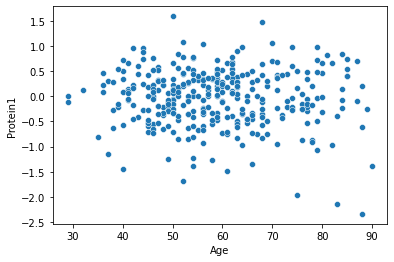

In [43]:
sns.scatterplot(x='Age', y='Protein1', data=data);

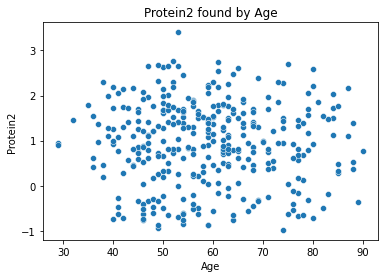

In [47]:
ax = sns.scatterplot(x='Age', y='Protein2', data=data)
ax.set_title('Protein2 found by Age')
ax.set_xlabel('Age');

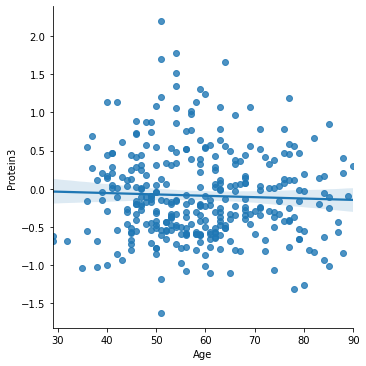

In [49]:
sns.lmplot(x='Age', y='Protein3', data=data);

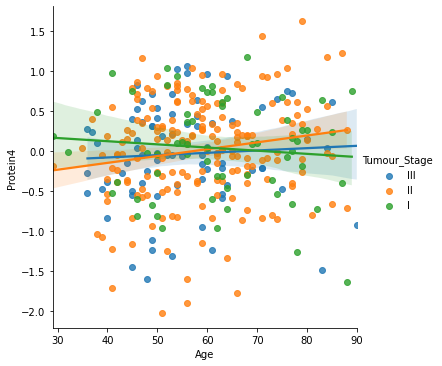

In [50]:
sns.lmplot(x='Age', y='Protein4', hue='Tumour_Stage', data=data);

# Correlation Matrix

In [57]:
cormat = data.corr()
round(cormat,3)

,Age,Protein1,Protein2,Protein3,Protein4,Gender_Identify
Age,1.000,-0.051,-0.022,-0.040,0.094,0.024
Protein1,-0.051,1.000,0.238,-0.129,0.280,0.151
Protein2,-0.022,0.238,1.000,-0.416,0.088,0.001
Protein3,-0.040,-0.129,-0.416,1.000,0.065,-0.018
Protein4,0.094,0.280,0.088,0.065,1.000,-0.014
Gender_Identify,0.024,0.151,0.001,-0.018,-0.014,1.000


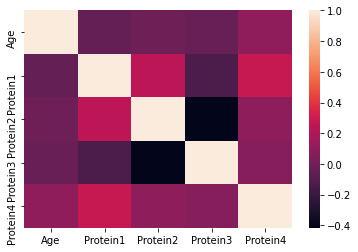

In [59]:
sns.heatmap(corr);

# Histogram

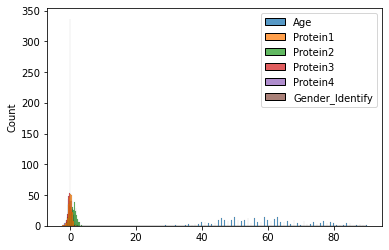

In [64]:
import seaborn as sns
sns.histplot(data);